In [305]:
import pandas as pd

In [306]:
Course_Code = pd.read_excel('Data and metadata/Course Codes.xlsx')

In [307]:
Student = pd.read_excel('Data and metadata/Student Profiles.xlsx')

In [308]:
Student.describe(include='object')

,STUDENT ID,SALUTATION,GENDER,NATIONALITY,LOCAL,FOREIGN,DOB,HIGHEST QUALIFICATION,NAME OF QUALIFICATION AND INSTITUTION,DESIGNATION,INTAKE NO,COMPLETION DATE,FULL-TIME OR PART-TIME,COURSE FUNDING,REGISTRATION FEE,PAYMENT MODE
count,244,244,244,244,229,120,244,244,244,244,244,244,244,244,244,244
unique,244,4,2,19,2,2,236,8,210,147,28,34,1,17,3,23
top,2020/1101-013/001,Ms,F,Singaporean,Y,,30/11/1983,Degree,O' level,-,70th,20/09/2019,Part-Time,Individual,107,Nets
freq,1,214,215,189,205,81,2,104,10,36,21,21,244,112,239,169


In [309]:
Student.describe()

,COURSE FEE,GPA
count,244.000000,244.000000
mean,2687.856557,2.758197
std,1825.495950,0.595987
min,888.000000,1.500000
25%,1388.000000,2.300000
50%,1712.000000,2.800000
75%,2996.000000,3.100000
max,5803.000000,4.000000


In [310]:
missing_values = Student.isnull().sum()
print('Looking for Missing Values:')
print(missing_values)

Looking for Missing Values:
STUDENT ID                                 0
SALUTATION                                 0
GENDER                                     0
NATIONALITY                                0
LOCAL                                     15
FOREIGN                                  124
DOB                                        0
HIGHEST QUALIFICATION                      0
NAME OF QUALIFICATION AND INSTITUTION      0
DATE ATTAINED HIGHEST QUALIFICATION        0
DESIGNATION                                0
INTAKE NO                                  0
COMMENCEMENT DATE                          0
COMPLETION DATE                            0
FULL-TIME OR PART-TIME                     0
COURSE FUNDING                             0
REGISTRATION FEE                           0
PAYMENT MODE                               0
COURSE FEE                                 0
GPA                                        0
dtype: int64


In [311]:
Student.columns

Index(['STUDENT ID', 'SALUTATION', 'GENDER', 'NATIONALITY', 'LOCAL', 'FOREIGN',
       'DOB', 'HIGHEST QUALIFICATION', 'NAME OF QUALIFICATION AND INSTITUTION',
       'DATE ATTAINED HIGHEST QUALIFICATION', 'DESIGNATION', 'INTAKE NO',
       'COMMENCEMENT DATE', 'COMPLETION DATE', 'FULL-TIME OR PART-TIME',
       'COURSE FUNDING', 'REGISTRATION FEE', 'PAYMENT MODE', 'COURSE FEE',
       'GPA'],
      dtype='object')

In [312]:
Student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   STUDENT ID                             244 non-null    object        
 1   SALUTATION                             244 non-null    object        
 2   GENDER                                 244 non-null    object        
 3   NATIONALITY                            244 non-null    object        
 4   LOCAL                                  229 non-null    object        
 5   FOREIGN                                120 non-null    object        
 6   DOB                                    244 non-null    object        
 7   HIGHEST QUALIFICATION                  244 non-null    object        
 8   NAME OF QUALIFICATION AND INSTITUTION  244 non-null    object        
 9   DATE ATTAINED HIGHEST QUALIFICATION    244 non-null    datetime64

In [313]:
Student['CITIZENSHIP_STATUS'] = ''
Student.loc[Student['LOCAL'] == 'Y', 'CITIZENSHIP_STATUS'] = 'L'
Student.loc[Student['FOREIGN'] == 'Y', 'CITIZENSHIP_STATUS'] = 'F'
Student.drop(['FOREIGN', 'LOCAL'], axis=1, inplace=True)

In [314]:
Student.loc[Student['HIGHEST QUALIFICATION'].isin(['Postgraduate Diploma','Postgraduate Diploma/\nDegree']), 'HIGHEST QUALIFICATION'] = 'Master'
Student.loc[Student['HIGHEST QUALIFICATION'] == ' ', 'HIGHEST QUALIFICATION'] = 'No Qualifications'

In [315]:
Student['HIGHEST QUALIFICATION'].unique()

array(['Certificate', 'Degree', 'Diploma', 'Master', 'Graduate Diploma',
       'No Qualifications'], dtype=object)

In [316]:
Student['PAYMENT MODE'].unique()

array(['NETS', 'CC JPM', 'GIRO', 'Cr Card', 'Giro', 'SMBC 278451',
       'CITI 067168', 'MBB 000023', 'SCB 726231', 'OCBC 006258',
       'Nets\nNets*', 'Nets', 'OCBC 000385', 'POSB 743523', 'OCBC 484773',
       'UOB 042724', 'DBS 346889', 'UOB 480958', 'UOB 000073',
       'UOB Cr Card - 12 months', 'Waived', 'OCBC 923215', 'DBS 002211'],
      dtype=object)

In [317]:
Student.loc[~Student['PAYMENT MODE'].isin(['NETS', 'GIRO', 'Giro', 'Cr Card']), 'PAYMENT MODE'] = 'Bank Transfer'
Student['PAYMENT MODE'] = Student['PAYMENT MODE'].str.replace('Giro', 'GIRO')

In [318]:
Student['PAYMENT MODE'].unique()

array(['NETS', 'Bank Transfer', 'GIRO', 'Cr Card'], dtype=object)

In [319]:
Student['SALUTATION'] = Student['SALUTATION'].str.replace('Mr ', 'Mr')

In [320]:
Student['COMPLETION DATE'] = Student['COMPLETION DATE'].astype('datetime64[ns]')

f:\anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '21/09/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
f:\anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '20/11/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
f:\anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '22/01/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
f:\anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '15/04/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

In [321]:
Student['DOB'] = pd.to_datetime(Student['DOB'], infer_datetime_format=True)
Student['DOB'] = Student['DOB'].astype('datetime64[ns]')

C:\Users\Rejey Ezekiel\AppData\Local\Temp\ipykernel_12172\4085476512.py:1: UserWarning: Parsing '23/03/1966' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  Student['DOB'] = pd.to_datetime(Student['DOB'], infer_datetime_format=True)
C:\Users\Rejey Ezekiel\AppData\Local\Temp\ipykernel_12172\4085476512.py:1: UserWarning: Parsing '27/11/1991' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  Student['DOB'] = pd.to_datetime(Student['DOB'], infer_datetime_format=True)
C:\Users\Rejey Ezekiel\AppData\Local\Temp\ipykernel_12172\4085476512.py:1: UserWarning: Parsing '23/04/1985' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  Student['DOB'] = pd.to_datetime(Student['DOB'], infer_datetime_format=True)
C:\Users\Rejey Ezekiel\AppData\Local\Temp\ipykernel_12172\4085476512.py:1: UserWarning: Parsing '15/03/1981' in DD/MM/YYYY format. Provide for

In [322]:
Student.loc[Student['REGISTRATION FEE'] == '107\n107','REGISTRATION FEE'] = 107
Student.loc[Student['REGISTRATION FEE'] == 'Waived','REGISTRATION FEE'] = 0


In [323]:
Student

,STUDENT ID,SALUTATION,GENDER,NATIONALITY,DOB,HIGHEST QUALIFICATION,NAME OF QUALIFICATION AND INSTITUTION,DATE ATTAINED HIGHEST QUALIFICATION,DESIGNATION,INTAKE NO,COMMENCEMENT DATE,COMPLETION DATE,FULL-TIME OR PART-TIME,COURSE FUNDING,REGISTRATION FEE,PAYMENT MODE,COURSE FEE,GPA,CITIZENSHIP_STATUS
0,2020/1101-013/001,Ms,F,Singaporean,1978-04-03,Certificate,"Certificate in Office Skills, ITE",2016-11-06,"Snr Associate, Client Services",13th,2020-01-06,2021-04-06,Part-Time,Individual - SFC,107,NETS,1712,3.0,L
1,2020/1101-013/002,Ms,F,Singaporean,1966-03-23,Certificate,"WSQ Higher Certificate in Human Resources, WPLN, Fundamentals Certificate in Early Childhood Care and Education",2018-02-06,Admin Officer,13th,2020-01-06,2021-04-06,Part-Time,Individual,107,NETS,1712,2.5,L
2,2020/1101-013/003,Ms,F,Singaporean,1988-04-12,Certificate,"Nitec in Service Skills (Office), ITE",2016-11-06,Admin Assistant,13th,2020-01-06,2021-04-06,Part-Time,Sponsored - no SDF,107,Bank Transfer,1712,2.0,L
3,2020/1101-014/004,Ms,F,Singaporean,1991-11-27,Degree,"Bachelor Science (Facilities & Events Management), SUSS",2017-06-10,HR Administrator,14th,2020-03-10,2021-06-09,Part-Time,Individual - SFC,107,NETS,1212,2.5,L
4,2020/1101-014/005,Ms,F,Singaporean,1985-04-23,Diploma,"Diploma in Procurement and Supply Management, SIPMM Academy",2016-08-10,Purchasing Executive,14th,2020-03-10,2021-06-09,Part-Time,Individual - SFC,107,NETS,1712,2.4,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,2019/5113-007/005,Ms,F,Singaporean,1973-01-10,Degree,Bachelor of Commerce (Accounting and Finance)/\nCurtin University of Technology,2017-11-05,"Head, Registry & Corp Admin",7th,2019-07-05,2020-01-04,Part-Time,Individual,107,Bank Transfer,5803,2.9,L
240,2019/5113-007/006,Ms,F,Indonesian (PR),1982-09-30,Degree,Bachelor of Economics (Accounting)/\nUniversitas Katolik Indonesia,2016-05-05,Finance Officer,7th,2019-07-05,2020-01-04,Part-Time,Individual,107,Bank Transfer,5803,2.0,L
241,2019/5113-006/003,Ms,F,Singaporean,1990-06-03,Degree,"Bachelor of Science in Hotel Administration (Hospitality Management)/\nUniversity of Nevada, Las Vegas",2015-06-08,HR Assistant,6th,2019-03-08,2019-09-07,Part-Time,Individual,107,Bank Transfer,5803,2.8,L
242,2019/5113-005/001,Ms,F,Singaporean,1981-11-14,Degree,Bachelor of Arts with Second Class Honours (Lower Division) in Business with Logistics and Supply Chain Management/\nUniversity of Northumbria at Newscastle,2014-08-04,Household Goods Coordinator,5th,2019-01-04,2019-07-03,Part-Time,Individual,107,Bank Transfer,5803,1.9,L


In [324]:
Student['COURSE FUNDING'].unique()

array(['Individual - SFC', 'Individual', 'Sponsored - no SDF',
       'Sponsored', 'Individual   ', 'Individual ', 'Individual-SFC',
       'Sponsored ', 'Individual - waived App Fee',
       'Individual - SFC + $1000 SCHOLARSHIP', 'Indivodual',
       'Sponsored   ', 'Individual  ', 'Sponsored  ', 'Sponsored-no SDF',
       'Indvidual - SFC', 'Sponsored - SDF'], dtype=object)

## Ask Tan Teck June wether follow meta data if thats the case where to put individual - SFC + $1000 SCHOLARSHIP : 
Individual, Individual - SFC, Sponsored, Individual - waived App Fee

In [325]:
Student.loc[Student['COURSE FUNDING'].isin(['Individual','Individual   ','Individual ', 'Indivodual','Individual  ']), 'COURSE FUNDING'] = 'Individual'
Student.loc[Student['COURSE FUNDING'].isin(['Sponsored','Sponsored ', 'Sponsored  ','Sponsored   ','Sponsored - no SDF','Sponsored-no SDF','Sponsored - SDF']), 'COURSE FUNDING'] = 'Sponsored'
Student.loc[Student['COURSE FUNDING'].isin(['Individual - SFC','Individual-SFC','Indvidual - SFC']), 'COURSE FUNDING'] = 'Individual - SFC'
Student.loc[Student['COURSE FUNDING'].isin(['Sponsored - no SDF','Sponsored-no SDF']), 'COURSE FUNDING'] = 'Sponsored - No SDF'

In [326]:
Student[Student['COURSE FUNDING']=='Individual - SFC + $1000 SCHOLARSHIP']

,STUDENT ID,SALUTATION,GENDER,NATIONALITY,DOB,HIGHEST QUALIFICATION,NAME OF QUALIFICATION AND INSTITUTION,DATE ATTAINED HIGHEST QUALIFICATION,DESIGNATION,INTAKE NO,COMMENCEMENT DATE,COMPLETION DATE,FULL-TIME OR PART-TIME,COURSE FUNDING,REGISTRATION FEE,PAYMENT MODE,COURSE FEE,GPA,CITIZENSHIP_STATUS
55,2020/2101-111/006,Ms,F,Singaporean,1988-10-18,Certificate,O' level,2018-03-28,Snr Client Service Executive,111th,2020-09-28,2021-06-23,Part-Time,Individual - SFC + $1000 SCHOLARSHIP,107,GIRO,1496,3.3,L
56,2020/2101-111/007,Ms,F,Singaporean,2001-11-12,Certificate,"Nitec in Electronics, Computer Networking & Communications, ITE",2019-06-28,HR Intern,111th,2020-09-28,2021-06-23,Part-Time,Individual - SFC + $1000 SCHOLARSHIP,107,GIRO,1996,3.3,L
57,2020/2101-111/008,Ms,F,Singaporean,1969-12-18,Certificate,"Basic Certificate in HRM, SHRI",2017-04-28,"Executive, Corporate Services",111th,2020-09-28,2021-06-23,Part-Time,Individual - SFC + $1000 SCHOLARSHIP,107,GIRO,1496,3.0,L
103,2020/2102-069/020,Ms,F,Singaporean,1977-02-13,Diploma,"Graduate Diploma in Business Administration (Operations & Logistics Management), SIM",2017-10-30,-,69th,2020-09-30,2020-11-20,Part-Time,Individual - SFC + $1000 SCHOLARSHIP,107,Bank Transfer,1495,3.0,L


In [327]:
Student['INTAKE NO'] = Student['INTAKE NO'].str.replace('rd', 'th')

In [328]:
Student.loc[Student['NAME OF QUALIFICATION AND INSTITUTION'].isin([' ','-', ]), 'NAME OF QUALIFICATION AND INSTITUTION'] = 'Unknown Institution / Qualification'

In [329]:
Student['DESIGNATION'] = Student['DESIGNATION'].str.rstrip()
Student.loc[Student['DESIGNATION'] == '-','DESIGNATION'] = 'No Designation'

In [330]:
Student.DESIGNATION.nunique()

145

In [331]:
Student['NATIONALITY'] = Student['NATIONALITY'].str.strip().str.replace('\n', ' ').str.replace('  ', ' ')
Student.loc[Student['NATIONALITY'] == 'Malaysian(PR)','NATIONALITY'] = 'Malaysian (PR)'

In [332]:
Student['NATIONALITY'].unique()

array(['Singaporean', 'Malaysian (PR)', 'Chinese', 'Malaysian', 'Indian',
       'Netherlands', 'Indian (PR)', 'Chinese (PR)', 'Filipino',
       'Filipino (PR)', 'Vietnamese', 'Myanmar', 'China (PR)',
       'Chinese (China)', 'Indonesian (PR)'], dtype=object)

In [333]:
Student['HIGHEST QUALIFICATION'].unique()

array(['Certificate', 'Degree', 'Diploma', 'Master', 'Graduate Diploma',
       'No Qualifications'], dtype=object)

In [334]:
Student

,STUDENT ID,SALUTATION,GENDER,NATIONALITY,DOB,HIGHEST QUALIFICATION,NAME OF QUALIFICATION AND INSTITUTION,DATE ATTAINED HIGHEST QUALIFICATION,DESIGNATION,INTAKE NO,COMMENCEMENT DATE,COMPLETION DATE,FULL-TIME OR PART-TIME,COURSE FUNDING,REGISTRATION FEE,PAYMENT MODE,COURSE FEE,GPA,CITIZENSHIP_STATUS
0,2020/1101-013/001,Ms,F,Singaporean,1978-04-03,Certificate,"Certificate in Office Skills, ITE",2016-11-06,"Snr Associate, Client Services",13th,2020-01-06,2021-04-06,Part-Time,Individual - SFC,107,NETS,1712,3.0,L
1,2020/1101-013/002,Ms,F,Singaporean,1966-03-23,Certificate,"WSQ Higher Certificate in Human Resources, WPLN, Fundamentals Certificate in Early Childhood Care and Education",2018-02-06,Admin Officer,13th,2020-01-06,2021-04-06,Part-Time,Individual,107,NETS,1712,2.5,L
2,2020/1101-013/003,Ms,F,Singaporean,1988-04-12,Certificate,"Nitec in Service Skills (Office), ITE",2016-11-06,Admin Assistant,13th,2020-01-06,2021-04-06,Part-Time,Sponsored,107,Bank Transfer,1712,2.0,L
3,2020/1101-014/004,Ms,F,Singaporean,1991-11-27,Degree,"Bachelor Science (Facilities & Events Management), SUSS",2017-06-10,HR Administrator,14th,2020-03-10,2021-06-09,Part-Time,Individual - SFC,107,NETS,1212,2.5,L
4,2020/1101-014/005,Ms,F,Singaporean,1985-04-23,Diploma,"Diploma in Procurement and Supply Management, SIPMM Academy",2016-08-10,Purchasing Executive,14th,2020-03-10,2021-06-09,Part-Time,Individual - SFC,107,NETS,1712,2.4,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,2019/5113-007/005,Ms,F,Singaporean,1973-01-10,Degree,Bachelor of Commerce (Accounting and Finance)/\nCurtin University of Technology,2017-11-05,"Head, Registry & Corp Admin",7th,2019-07-05,2020-01-04,Part-Time,Individual,107,Bank Transfer,5803,2.9,L
240,2019/5113-007/006,Ms,F,Indonesian (PR),1982-09-30,Degree,Bachelor of Economics (Accounting)/\nUniversitas Katolik Indonesia,2016-05-05,Finance Officer,7th,2019-07-05,2020-01-04,Part-Time,Individual,107,Bank Transfer,5803,2.0,L
241,2019/5113-006/003,Ms,F,Singaporean,1990-06-03,Degree,"Bachelor of Science in Hotel Administration (Hospitality Management)/\nUniversity of Nevada, Las Vegas",2015-06-08,HR Assistant,6th,2019-03-08,2019-09-07,Part-Time,Individual,107,Bank Transfer,5803,2.8,L
242,2019/5113-005/001,Ms,F,Singaporean,1981-11-14,Degree,Bachelor of Arts with Second Class Honours (Lower Division) in Business with Logistics and Supply Chain Management/\nUniversity of Northumbria at Newscastle,2014-08-04,Household Goods Coordinator,5th,2019-01-04,2019-07-03,Part-Time,Individual,107,Bank Transfer,5803,1.9,L


In [335]:
import seaborn as sns

In [338]:
Student.to_csv('Student Profiles Wrangled.csv', index=False)

f:\anaconda\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
f:\anaconda\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


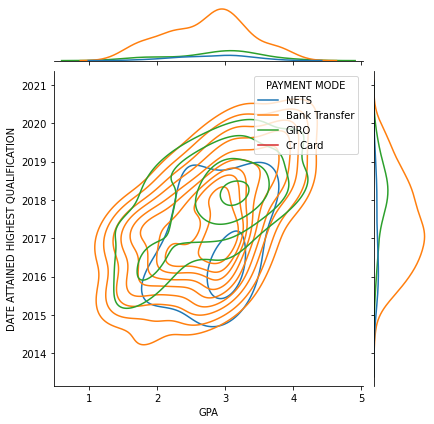

In [337]:
sns.jointplot(data=Student, x="GPA", y="DATE ATTAINED HIGHEST QUALIFICATION",hue="PAYMENT MODE",kind="kde")